# [CSE426] Image Processing
Teaching Assistant: Hyunmin Ban (hmban1996@khu.ac.kr)

Professor: Hui Yong Kim (hykim.v@khu.ac.kr)

---

# P1:  Digital Image Representation (10점)

### 학습목표
- 이미지 파일을 다른 포맷으로 저장하면서 파일 포맷에 대해 이해한다.
- 스스로 간단한 이미지 처리를 하면서 OpenCV와 친숙해진다.

### 실습내용
실습은 다음 순서로 진행됩니다.
- 0) 실습에서 사용되는 패키지 import
- 1) 주어진 이미지 loading
- 2) 이미지 저장 
- 3) 파일 크기 확인
- 4) 이미지 자르기
- 5) Matplotlib로 이미지 확인
- 6) 스스로 영상처리 기술 구현
- 7) Discussion

### 점수
- 2) 빈칸에 대한 합 2점
- 4) 빈칸에 대해 3점
- 6)에서 코드 구현 여부에 따라 2점
- Discussion에서 3점

### 제출방법
- .ipynb 파일과 함께 .html 파일 (File -> export (Download) as -> HTML)도 함께 제출하세요. 하나만 제출할시 감점이 있습니다.

## Imports

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import os

## 1) Load Image

In [2]:
img = cv2.imread('Lenna.png') # 이미지 파일 읽기

cv2.imshow('image', img)      # 이미지 display
cv2.waitKey(0)                # keyboard입력을 대기하는 함수로 0이면 key입력까지 무한대기
cv2.destroyAllWindows()       # 화면에 나타난 윈도우를 종료

## 2) Save Image

In [3]:
def save_image(fileName, image, png_compression=None, jpg_quality=None):
    # jpg quality는 0 ~ 100 사이 값을 입력으로 받아 값이 높을 수록 화질이 더 좋다
    # png compression은 0 ~ 9 사이 값을 입력으로 받아 값이 높을 수록 압축률이 더 높다
    if png_compression:
        cv2.imwrite(fileName, image, [int(cv2.IMWRITE_PNG_COMPRESSION),png_compression])
    elif jpg_quality:
        cv2.imwrite(fileName, image, [int(cv2.IMWRITE_JPEG_QUALITY),jpg_quality])
    else:
        cv2.imwrite(fileName, image)            

In [4]:
png_output = "Save_Lenna.png"                  # 저장할 파일 이름
save_image(png_output, img, png_compression=1)  ##### png compression 설정하면서 파일 크기 확인

jpg_output = "Save_Lenna.jpg"
save_image(jpg_output, img, jpg_quality=50)      ##### jpg quality 설정하면서 영상 화질 확인

bmp_output = "Save_Lenna.bmp"
save_image(bmp_output, img)

## 3) Check File Size 

In [5]:
file_size = os.path.getsize(png_output)
print("PNG file size: " + str(file_size) + " Bytes")

file_size = os.path.getsize(jpg_output)
print("JPG file size: " + str(file_size) + " Bytes")

file_size = os.path.getsize(bmp_output)
print("BMP file size: " + str(file_size) + " Bytes")

PNG file size: 525403 Bytes
JPG file size: 24329 Bytes
BMP file size: 786486 Bytes


## 4) Crop Image

가로 시작점을 150, 세로 시작점을 200으로 해서 height가 300, width가 200인 이미지로 crop하세요.  

In [6]:
def crop_image(image):
    ROI = image[200:500, 150:350] # Region of interest
    return ROI

In [7]:
png = cv2.imread(png_output) # 저장한 PNG파일 읽기
jpg = cv2.imread(jpg_output) # 저장한 JPG파일 읽기
bmp = cv2.imread(bmp_output) # 저장한 BMP파일 읽기

cropped_png = crop_image(png)
cropped_jpg = crop_image(jpg)
cropped_bmp = crop_image(bmp)

## 5) Check Images with Matplotlib

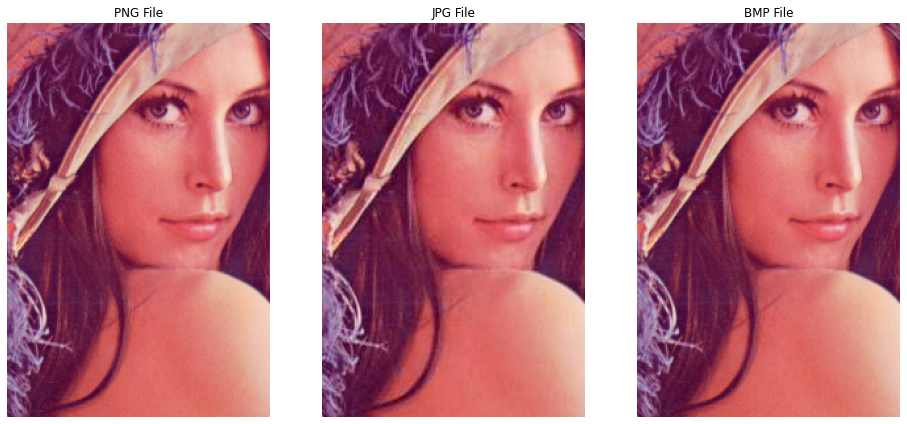

In [8]:
fig = plt.figure(figsize=(16,16))

ax1 = fig.add_subplot(1,3,1)
# OpenCV는 BGR로 이미지를 저장하기 때문에 Plot하기 위해 RGB로 변환해야 된다
ax1.imshow(cv2.cvtColor(cropped_png,cv2.COLOR_BGR2RGB))
ax1.set_title('PNG File')
ax1.axis("off")

ax2 = fig.add_subplot(1,3,2)
ax2.imshow(cv2.cvtColor(cropped_jpg,cv2.COLOR_BGR2RGB))
ax2.set_title('JPG File')
ax2.axis("off")

ax3 = fig.add_subplot(1,3,3)
ax3.imshow(cv2.cvtColor(cropped_bmp,cv2.COLOR_BGR2RGB))
ax3.set_title('BMP File')
ax3.axis("off")

plt.show()

## 6) Your Own Image Processing

아래 링크에서 함수들을 참고하여 자기 자신만의 이미지 처리를 해보세요. 함수를 사용 안하고 직접 구현해도 됩니다.  
https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html

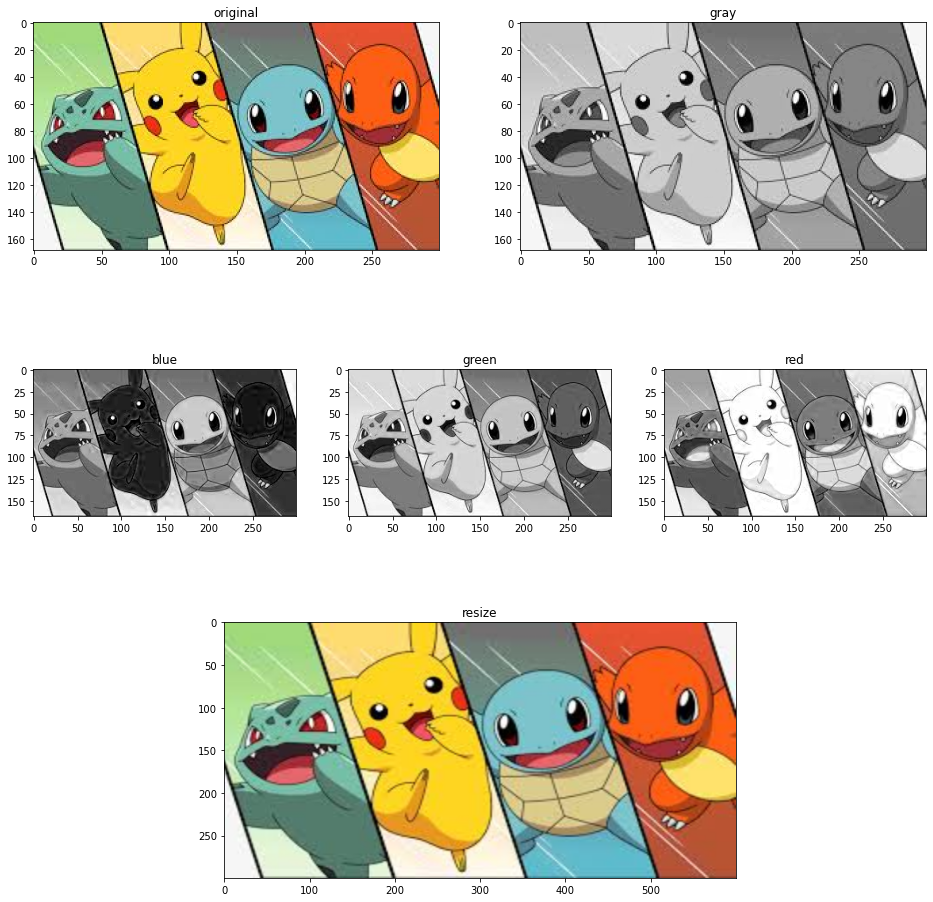

In [9]:
img = cv2.imread('pocket.jpg')

original = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # BGR로 저장하므로 RGB로 바꾸기
resize = cv2.resize(original,(600,300))  # 이미지 크기 재조정
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # 이미지 색 GRAY로 바꾸기
b, g, r = cv2.split(img) # 이미지를 B, G, R 채널로 분할하기

fig = plt.figure(figsize = (16,16))

ax1 = fig.add_subplot(3,2,1)
ax1.imshow(original)
ax1.set_title('original')

ax2 = fig.add_subplot(3,2,2)
ax2.imshow(gray, cmap = 'gray')
ax2.set_title('gray')

ax3 = fig.add_subplot(3,1,3)
ax3.imshow(resize)
ax3.set_title('resize')


ax4 = fig.add_subplot(3,3,4)
ax4.imshow(b, cmap = 'gray')
ax4.set_title('blue')

ax5 = fig.add_subplot(3,3,5)
ax5.imshow(g, cmap = 'gray')
ax5.set_title('green')

ax6 = fig.add_subplot(3,3,6)
ax6.imshow(r, cmap = 'gray')
ax6.set_title('red')

plt.show()

## 7) Discussion

**1) 이미지를 저장할 때 각 이미지 포맷 (PNG, JPG, BMP) 특징에 대해 설명하세요.**

[답변작성]

PNG는 무손실 압축을 사용해서 이미지를 저장한다. 무손실 압축을 사용해서 BMP 파일보다는 용량이 작고 JPG 파일보다는 용량이 크다. JPG 파일보다는 화질이 좋다. 

JPG는 손실 압축을 사용해서 이미지를 저장하기 때문에 이미지의 용량이 크게 감소된다.하지만 압축을 하는 과정에서 화질이 낮아지게 된다. 

BMP는 압축을 하지 않고 이미지를 저장한다. 압축을 하지 않기 때문에 손실이 별로 없어 다른 이미지 포맷보다는 화질이 좋지만 파일의 크기가 다른 포맷에 비해 크다는 단점이 있다. 


**2) 각 이미지 포맷 (PNG, JPG, BMP)에서 영상 화질과 용량이 다른 이유를 설명하세요.**

[답변작성]

각 이미지 포맷에서 영상 화질과 용량이 다른 이유는 압축 때문이다. 압축을 많이 하면 할 수록 용량은 줄어들지만 화질이 낮아지게 된다. 반대로 압축을 하지 않고 저장하게 되면 용량은 크지만 원본 그대로의 화질을 가질 수 있게 된다. 


**3) Your Own Image Processing에서 스스로 영상처리 기술을 구현하면서 어떤 기술을 넣었는지 설명하세요.**

[답변작성]

cv2.imread를 통해서 이미지를 불러왔고 원래의 이미지를 출력하기 위해서는 BGR로 저장된 것을 RGB로 바꿔주었습니다. cv2.resize를 통해서 이미지의 크기를 약 2배 정도 확대했습니다. cv2.cvtColor를 이용해서 이미지의 색들을 변환할 수 있는데 그 중에서 COLOR_BGR2GRAY를 이용해서 컬러이미지를 회색이미지로 바꾸어주었습니다. 마지막으로 원래 이미지를 blue, green, red 채널로 분할했습니다. cmap = 'gray'로 설정을 해야 회색 이미지들이 잘 출력되기 때문에 설정을 바꾸어 주었습니다. 각각 구현한 이미지들은 plot을 통해서 출력하였습니다. 


---